# Ensuring enough number of points
From all the colors (or unique class of event logs) 

In [2]:
from src import *
from src.models.AlmaClasses import *
palette = PaletteFileDB(
    filename='../data/processed/colors-almaAntenna.pkl', 
    colorFunction=paintedForAlmaAntennas )

colors=palette.getColors()

#db = DelaysFileDB( caseName="CaseAntennaInArray", path= '../' + config.FILEPATH_DB+"/delays") 
#db = DelaysFileDB( caseName="CaseAntennaObserving", path= '../' + config.FILEPATH_DB+"/delays") 
db = DelaysFileDB( caseName="CaseRadioSetup", path= '../' + config.FILEPATH_DB+"/delays") 

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
# How many unique colors for this case?
"%s : %s colors %s" % (db.caseName, len(db.unique_colors()), db.unique_colors()[:20])

'CaseRadioSetup : 9 colors [376, 382, 383, 384, 385, 386, 534, 606, 999]'

In [5]:
# How many individual delayes are registered for this case?
"Pairs: %s in %s different cases" % (db.total_pairs(), db.total_cases())

'Pairs: 18 in 599 different cases'

Now let's define a *first criteria* for meaninguful pairs. The most basic one is to analyze just some sets having enough amount of information, in this case, set by the parameter *MIN_NUMBER_OF_SAMPLES*

In [6]:
MIN_NUMBER_OF_SAMPLES = 100
meaningfulPairs, discarded = {}, 0
for (a,b) in db.pair_names():
    ipp = db._instances_per_pair[(a,b)]
    dpp = db._delays_per_pair[(a,b)]
    percen = 100.0*ipp/db.total_cases()
    
    if dpp >= MIN_NUMBER_OF_SAMPLES:    
        meaningfulPairs[(a,b)] = ( percen, ipp,  dpp ) 
        
print ("Ommiting %s having less than %s samples (%s meaningful)" % ( db.total_pairs() - len(meaningfulPairs) , MIN_NUMBER_OF_SAMPLES, len(meaningfulPairs)))

for (a,b) in meaningfulPairs.keys()[:10]:
    percen, ipp,  dpp = meaningfulPairs[(a,b)][0], meaningfulPairs[(a,b)][1], meaningfulPairs[(a,b)][2]
    print ("%s\tInstances / Delays = (%.1f%%) %s / %s" % ( (a,b), percen, ipp,  dpp ) )


Ommiting 3 having less than 100 samples (15 meaningful)
(385, 386)	Instances / Delays = (24.7%) 148 / 148
(376, 382)	Instances / Delays = (94.5%) 566 / 566
(382, 385)	Instances / Delays = (93.7%) 561 / 561
(382, 384)	Instances / Delays = (94.5%) 566 / 566
(382, 386)	Instances / Delays = (93.7%) 561 / 561
(384, 385)	Instances / Delays = (93.7%) 561 / 561
(382, 383)	Instances / Delays = (66.1%) 396 / 396
(376, 386)	Instances / Delays = (93.7%) 561 / 561
(383, 386)	Instances / Delays = (93.7%) 561 / 561
(376, 385)	Instances / Delays = (93.7%) 561 / 561


In [7]:
#pp=(436, 440)
#colors[pp[0]] , "----------------", colors[pp[1]]

## Searching for regularitites in every pair
We already found a subset of pairs (a,b) that has at least certain amount of data to work with them. First, let's define our outlier function based on rank and sensivity

In [8]:
from pandas import Series
from matplotlib import pyplot
import numpy as np

def minmax_rank_based( values, sensitivity ):
    value_counts = Series(sorted(values)).value_counts()
    cumsum = value_counts.cumsum()
    typicalValues = cumsum[ cumsum <= sensitivity * value_counts.sum() ]
    try:
        return min(typicalValues.index), max(typicalValues.index)
    except:
        return (-1,-1)

def graph(delays, str = ""):
    fig = pyplot.figure()
    fig.suptitle(str)
    pyplot.plot(delays)
    pyplot.show()
    
def graph_hist(delays, str = ""):
    fig = pyplot.figure()
    fig.suptitle(str)
    pyplot.hist(delays)
    pyplot.show()
    
def strip(delays, perc):
    d2 = delays[:]
    d2.sort()
    L = int ( len(d2)/2.0 * (1.0 - perc/100.0) )
    return d2[ L:-L ]

---- (385, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Done Defluxing band #${N}')
---- (386, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} powered on.')


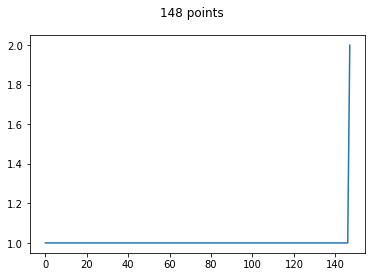

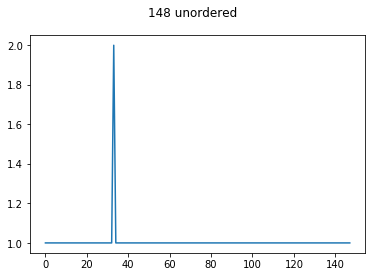

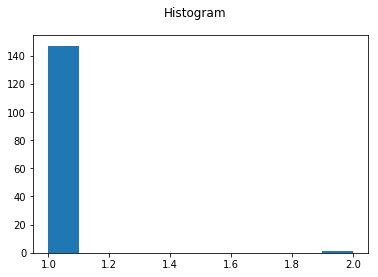

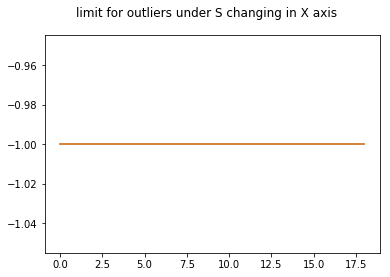

count    148.000000
mean       1.006757
std        0.082199
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        2.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (376, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Try to power on band #${N}')
---- (382, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Demagnetizing band #${N}')


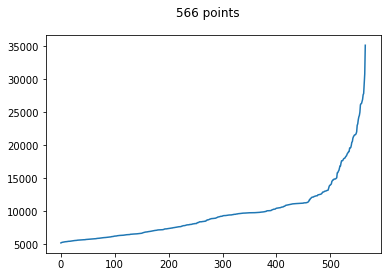

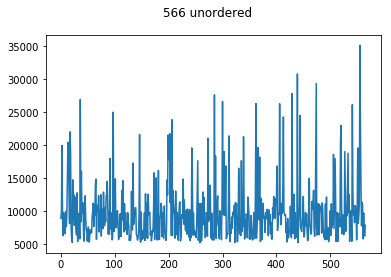

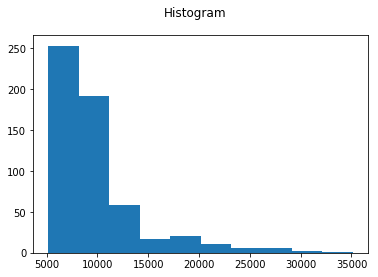

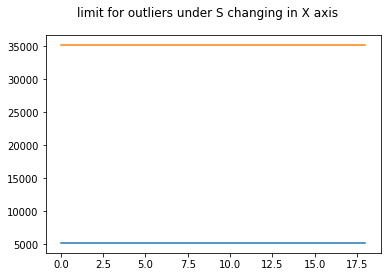

count      566.000000
mean      9734.948763
std       4505.371672
min       5171.000000
25%       6551.500000
50%       8875.000000
75%      10968.750000
max      35130.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (382, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Demagnetizing band #${N}')
---- (385, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Done Defluxing band #${N}')


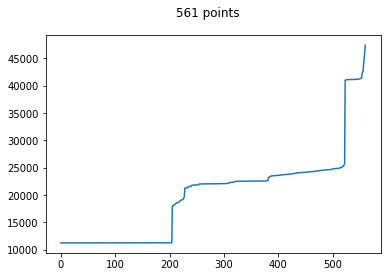

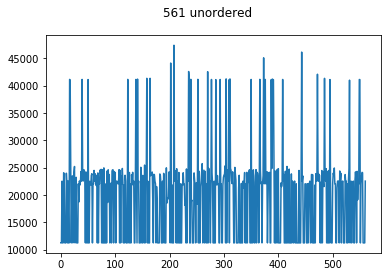

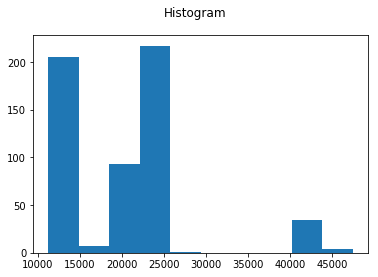

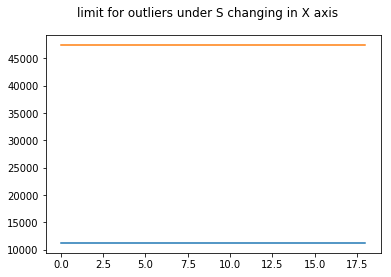

count      561.000000
mean     19892.017825
std       8141.766433
min      11246.000000
25%      11251.000000
50%      22058.000000
75%      23803.000000
max      47422.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (382, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Demagnetizing band #${N}')
---- (384, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Defluxing band #${N}')


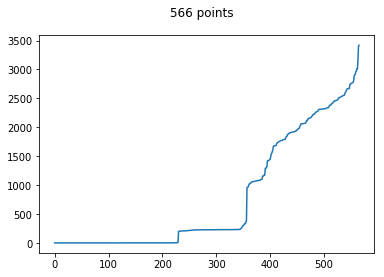

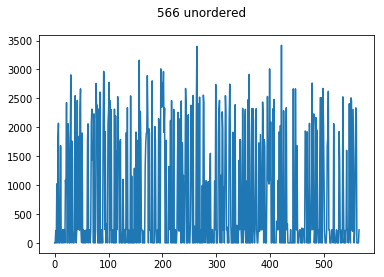

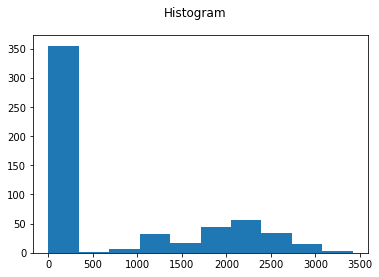

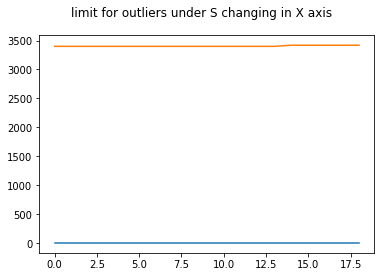

count     566.000000
mean      790.270318
std       990.613624
min         0.000000
25%         0.000000
50%       227.000000
75%      1782.750000
max      3419.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (382, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Demagnetizing band #${N}')
---- (386, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} powered on.')


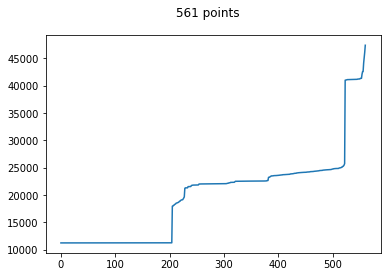

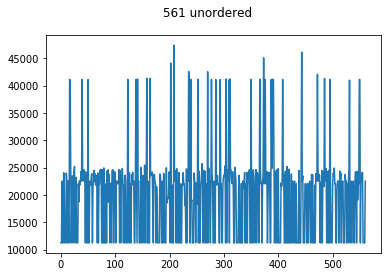

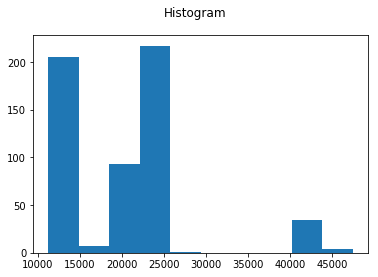

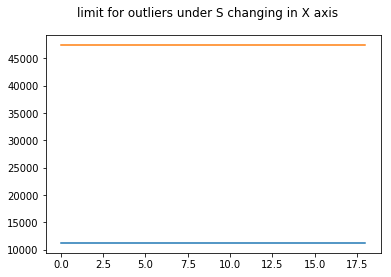

count      561.000000
mean     19892.283422
std       8141.652398
min      11246.000000
25%      11251.000000
50%      22058.000000
75%      23803.000000
max      47422.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (384, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Defluxing band #${N}')
---- (385, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Done Defluxing band #${N}')


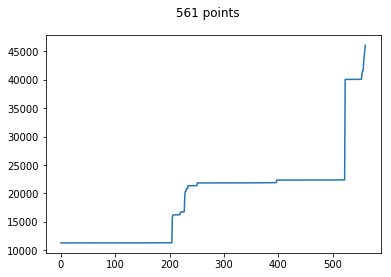

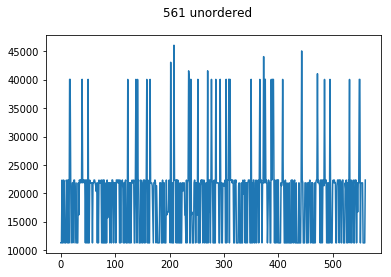

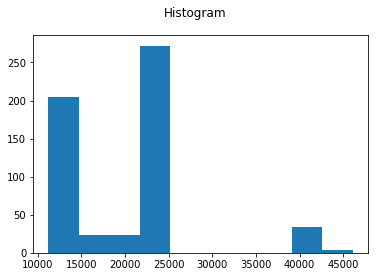

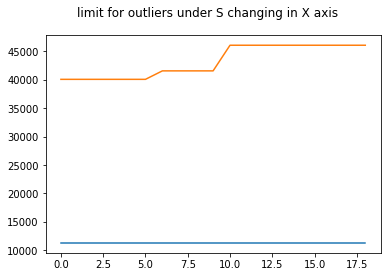

count      561.000000
mean     19099.654189
std       7683.723326
min      11245.000000
25%      11250.000000
50%      21825.000000
75%      22326.000000
max      46100.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (382, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Begin Demagnetizing band #${N}')
---- (383, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Done Demagnetizing band #${N}')


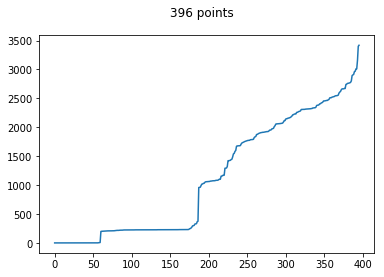

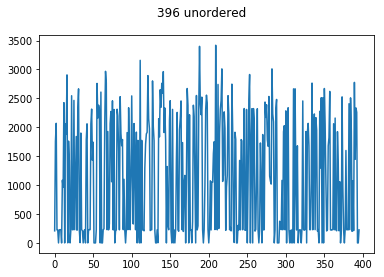

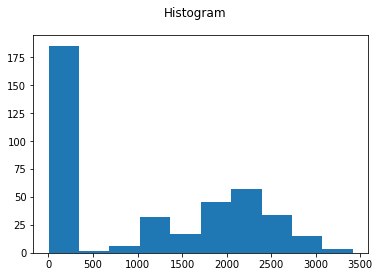

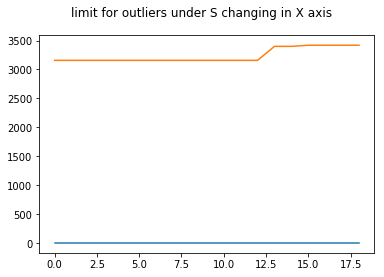

count     396.000000
mean     1129.363636
std      1009.694153
min         1.000000
25%       226.000000
50%      1059.000000
75%      2079.750000
max      3419.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (376, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Try to power on band #${N}')
---- (386, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} powered on.')


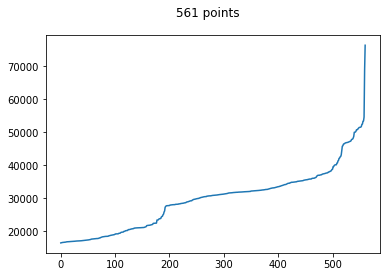

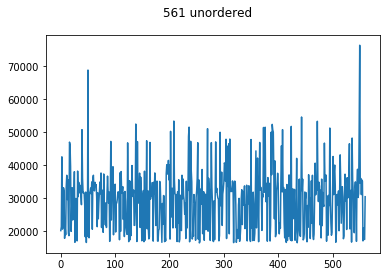

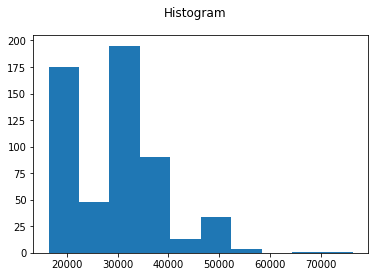

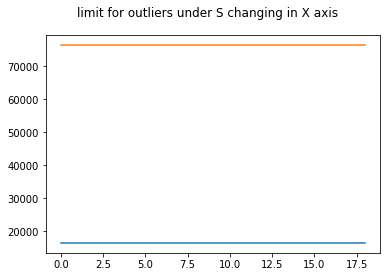

count      561.000000
mean     29539.484848
std       9234.843457
min      16422.000000
25%      20983.000000
50%      30809.000000
75%      34466.000000
max      76259.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (383, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Done Demagnetizing band #${N}')
---- (386, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Receiver band #${N} powered on.')


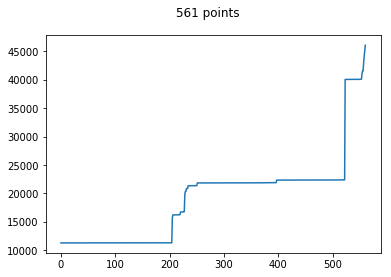

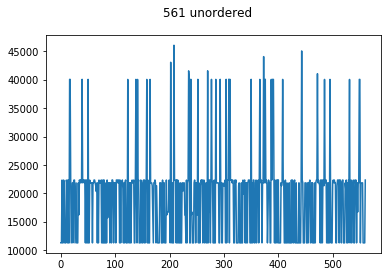

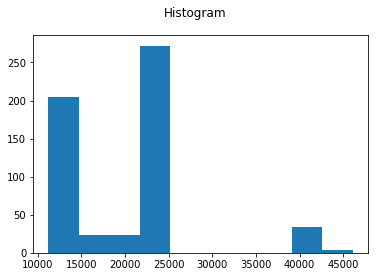

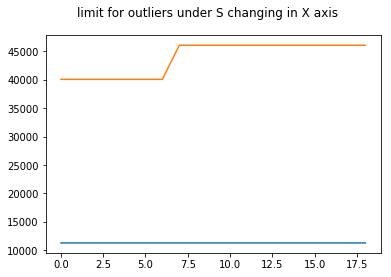

count      561.000000
mean     19100.037433
std       7683.642955
min      11245.000000
25%      11251.000000
50%      21825.000000
75%      22326.000000
max      46100.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------
---- (376, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::powerUpBandInternal(ReceiverBandMod::ReceiverBand)] Try to power on band #${N}')
---- (385, '[CONTROL/${ANT}/FrontEnd - void FrontEndImpl::mixerDefluxInternal(ReceiverBandMod::ReceiverBand)] Done Defluxing band #${N}')


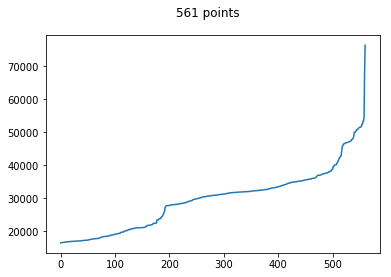

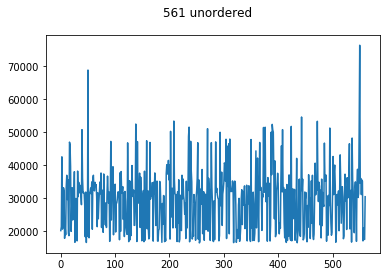

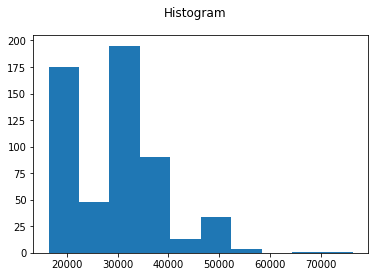

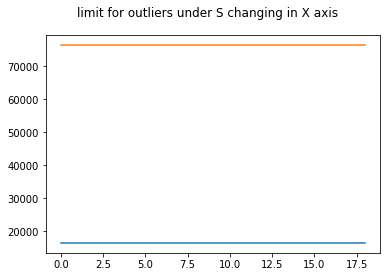

count      561.000000
mean     29539.219251
std       9234.932341
min      16421.000000
25%      20983.000000
50%      30809.000000
75%      34465.000000
max      76259.000000
dtype: float64
---------------------------------- NEXT GRAPH ----------------------------------


In [9]:
pairs = meaningfulPairs.keys()
for i in range(10):
    (a,b) = pairs[0 + i]
#     (a,b) = pairs[50 + i]
    # a= 510; b = 511
    delays = db.getDelays(a,b)

    delays.sort()
    changingSensitivity=[ minmax_rank_based( db.getDelays(a,b), 0.8 + S/100.0 ) for S in range(1, 20) ]

    print "----", (a, colors[a])
    print "----", (b, colors[b])

    graph( delays, "%s points" % ( len(delays) ) )
    graph( db.getDelays(a,b), "%s unordered" % ( len(delays) ) )
    graph_hist( delays, "Histogram" )
    graph(changingSensitivity, "limit for outliers under S changing in X axis")
    
    print Series(delays).describe()
    
    print "---------------------------------- NEXT GRAPH ----------------------------------"
    
    #graph( [ minmax_rank_based( delays, 0.5 + S/100.0 ) for S in range(1, 50) ], "same, but sorted" )
#     graph( strip(delays, 80), "(80 %%) %s points" % ( len(strip(delays, 80)) ) )
#     graph( [ minmax_rank_based( strip(delays, 80), 0.8 + S/100.0 ) for S in range(1, 20) ], "same, but 80% stripped" )